In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

In [3]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [5]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


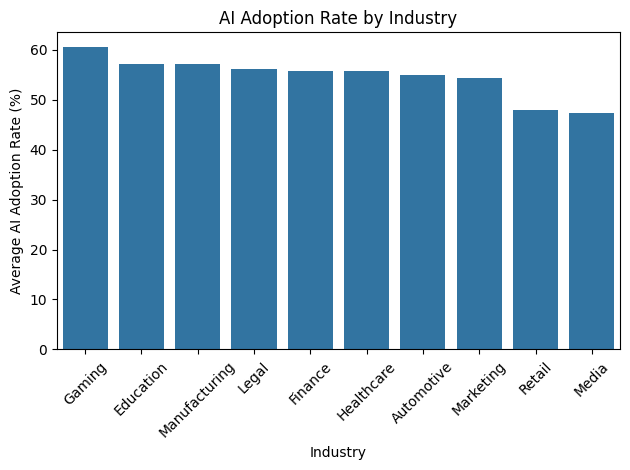

In [31]:
top_industries = df.groupby("Industry")['AI Adoption Rate (%)'].mean().sort_values(ascending=False)

sns.barplot(x=top_industries.index, y=top_industries.values)
plt.xticks(rotation=45)
plt.ylabel("Average AI Adoption Rate (%)")
plt.title("AI Adoption Rate by Industry")
plt.tight_layout()
plt.show()


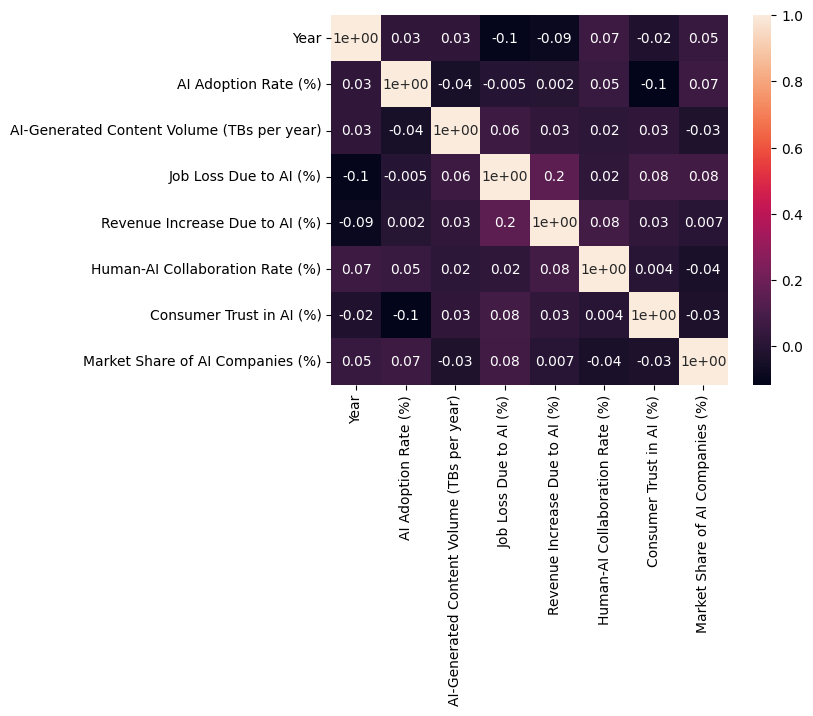

In [38]:
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr , annot = True , fmt = ".1")

plt.show()

In [43]:
# Country wise AI adaptation 

fig  = px.choropleth(df , 
                     locations='Country' , 
                     color = 'AI Adoption Rate (%)' , 
                     color_continuous_scale='Viridis' , 
                     title="AI Adaptaion Rate ",
                     locationmode='counr')
fig.show()

In [46]:
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='AI Adoption Rate (%)',
    color_continuous_scale='Viridis',
    title="AI Adoption Rate by Country"
)
import plotly.io as pio
pio.renderers.default = 'iframe'  # or 'notebook_connected'

fig.show()


In [47]:
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='AI-Generated Content Volume (TBs per year)',
    color_continuous_scale='Viridis',
    title="AI-Generated Content Volume by Country"
)
import plotly.io as pio
pio.renderers.default = 'iframe'  # or 'notebook_connected'

fig.show()


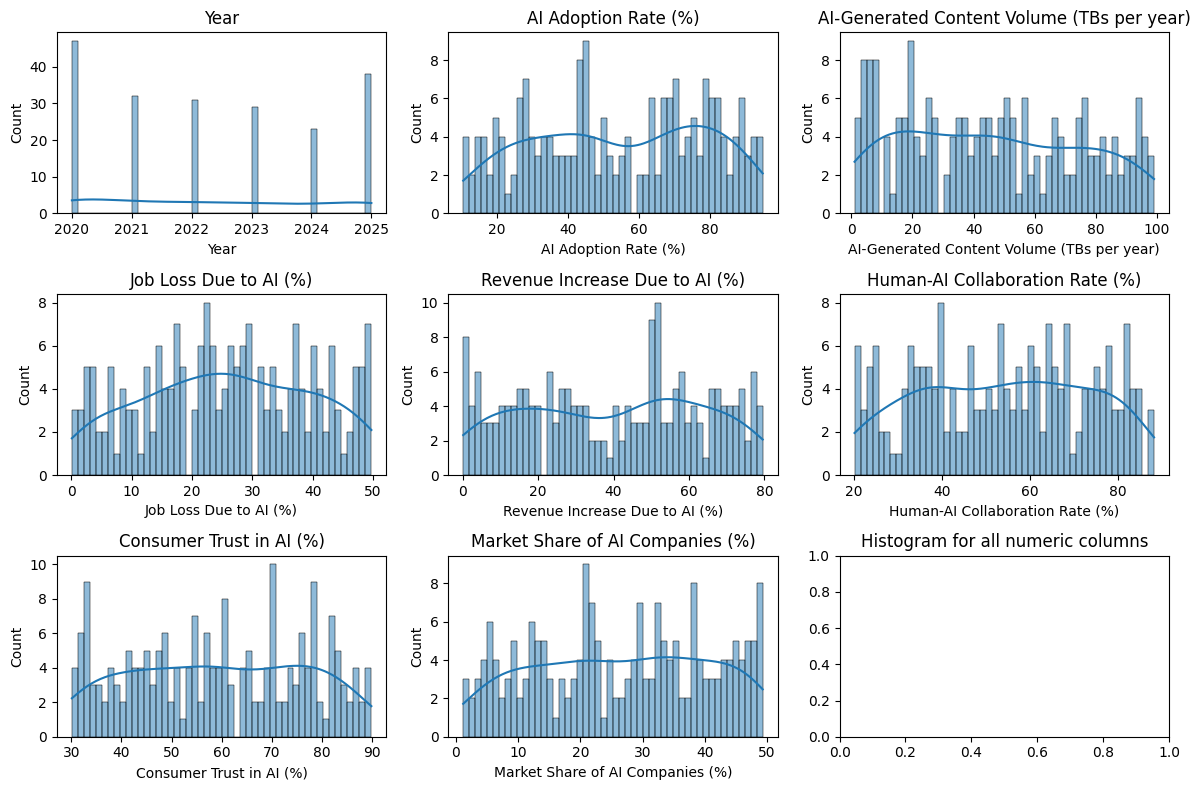

In [59]:
num_cols = df.select_dtypes(include = 'number')
n_cols = 3
n_rows = 3

fig , axes = plt.subplots(n_rows , n_cols , figsize = (12,8))
axes = axes.flatten()
for i , col in enumerate(num_cols): 
    sns.histplot(df[col] , kde=True , bins = 50 , ax = axes[i])
    axes[i].set_title(col)

plt.title("Histogram for all numeric columns")
plt.tight_layout()
plt.show()


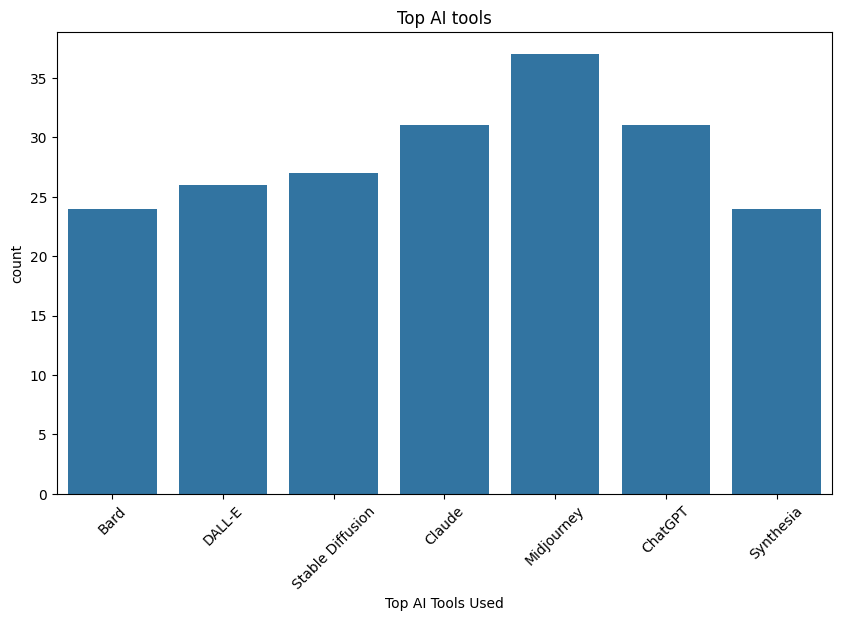

In [68]:
plt.figure(figsize = (10 , 6))
sns.countplot(x = df['Top AI Tools Used'])
plt.title("Top AI tools")
plt.xticks(rotation = 45)
plt.show()

In [69]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


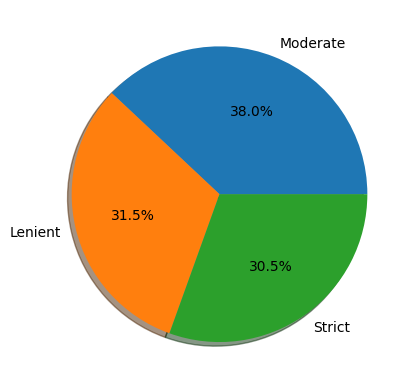

In [76]:
# regulation status 
reg_stat = df['Regulation Status'].value_counts()
plt.pie(x = reg_stat, labels = reg_stat.index,autopct='%1.1f%%' , shadow = True )
plt.show()